# Exploratory Data Analysis
First load some necessary modules and set the system path.

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import os
color = sns.color_palette()

%matplotlib inline

pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999
os.chdir('/san-data/usecase/magnet_g/misc/PCA_DATA_VIS/Yiming/Summer 2017') 

List the files present in the "Summer 2017" folder.

In [4]:
from subprocess import check_output
print(check_output(["ls", "../Summer 2017"]).decode("utf8"))

Accuracy
final_task.R
iREADY
plot_functions.R
properties_2016.csv
traffic_speed_metrics.R
train_2016_v2.csv
unsupervised.R



## train_2016_v2 Exploration

In [9]:
train_df = pd.read_csv("train_2016_v2.csv", parse_dates = ["transactiondate"])
train_df.shape

(90275, 3)

In [11]:
train_df.head()

,parcelid,logerror,transactiondate
0,11016594,0.0276,2016-01-01
1,14366692,-0.1684,2016-01-01
2,12098116,-0.0040,2016-01-01
3,12643413,0.0218,2016-01-02
4,14432541,-0.0050,2016-01-02


The target variable is **logerror**. Let's see how this varialbe is distributed.

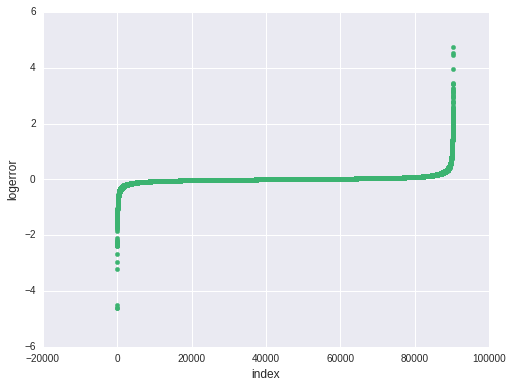

In [14]:
plt.figure(figsize = (8, 6))
plt.scatter(range(train_df.shape[0]), np.sort(train_df.logerror.values), color = "mediumseagreen")
plt.xlabel('index', fontsize = 12)
plt.ylabel('logerror', fontsize = 12)
plt.show()

There are some outliers on both sides. So let's move some outliers out and create a histogram plot.

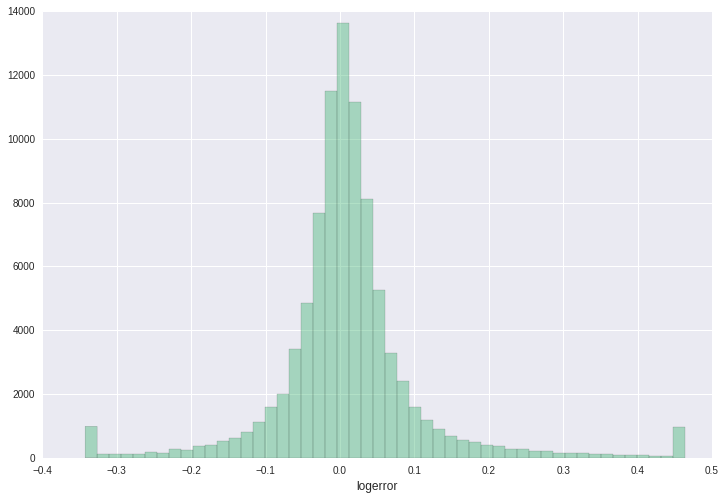

In [15]:
# upper and lower limits
ulimit = np.percentile(train_df.logerror.values, 99) # 99 percentile
llimit = np.percentile(train_df.logerror.values, 1)# 1 percentile
train_df['logerror'].ix[train_df['logerror'] > ulimit] = ulimit
train_df['logerror'].ix[train_df['logerror'] < llimit] = llimit

plt.figure(figsize = (12, 8))
sns.distplot(train_df.logerror.values, bins = 50, kde = False, color = "mediumseagreen")
plt.xlabel('logerror', fontsize = 12)
plt.show()

Now it looks like a perfect normal distribution for **logerror**.